<a href="https://colab.research.google.com/github/johnjkiran/TSAI/blob/master/S9/S9Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from datetime import datetime
print("Current Date/Time: ", datetime.now())

Current Date/Time:  2020-03-21 22:45:06.310469


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR

In [19]:
from importlib.machinery import SourceFileLoader
from os.path import join
config = SourceFileLoader('config',join('/content/drive/My Drive/Colab Notebooks/S9','config.py')).load_module()
from config import ModelConfig
# View model config
args = ModelConfig()
args.print_config()

print()
init_seed(args)

Model Parameters:
{ 'batch_size_cpu': 64,
  'batch_size_cuda': 64,
  'dropout': 0.15,
  'epochs': 40,
  'l1_decay': 3e-06,
  'l2_decay': 0.001,
  'lr': 0.2,
  'max_lr': 0.01,
  'momentum': 0.9,
  'num_workers': 4,
  'seed': 1}



In [0]:
utils = SourceFileLoader('utils',join('/content/drive/My Drive/Colab Notebooks/S9','utils.py')).load_module()
from utils import *

In [6]:
!pip install albumentations==0.4.5
cifar_file = SourceFileLoader('cifar_file',join('/content/drive/My Drive/Colab Notebooks/S9','cifar_file.py')).load_module()
from cifar_file import DataEngine
data = DataEngine(args)

Extracting ./cifar-10-python.tar.gz to .
Files already downloaded and verified


truck   dog plane  ship


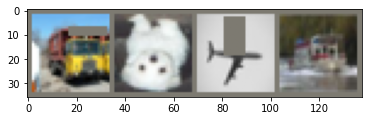

In [7]:
# get some random training images
dataiter = iter(data.train_loader)
images, labels = dataiter.next()
# show images
imshow(torchvision.utils.make_grid(images[:4]))
# print labels
print(' '.join('%5s' % data.classes[labels[j]] for j in range(4)))

In [0]:
QuizDNN = SourceFileLoader('QuizDNN',join('/content/drive/My Drive/Colab Notebooks/S9','QuizDNN.py')).load_module()
from QuizDNN import Net

In [20]:
device = which_device()
net = Net(args)
model = net.to(device)
show_model_summary(model, (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           9,216
              ReLU-6           [-1, 32, 32, 32]               0
       BatchNorm2d-7           [-1, 32, 32, 32]              64
         MaxPool2d-8           [-1, 32, 16, 16]               0
            Conv2d-9           [-1, 64, 16, 16]          18,432
             ReLU-10           [-1, 64, 16, 16]               0
      BatchNorm2d-11           [-1, 64, 16, 16]             128
          Dropout-12           [-1, 64, 16, 16]               0
           Conv2d-13           [-1, 64, 16, 16]          36,864
             ReLU-14           [-1, 64,

In [0]:
train = SourceFileLoader('train',join('/content/drive/My Drive/Colab Notebooks/S9','train.py')).load_module()
from train import train
test = SourceFileLoader('test',join('/content/drive/My Drive/Colab Notebooks/S9','test.py')).load_module()
from test import test

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)
scheduler = OneCycleLR(optimizer, max_lr=args.max_lr, epochs=args.epochs,
                       steps_per_epoch=len(data.train_loader))

def run(l1_decay=0.0, l2_decay=0.0):
  test_losses = []
  test_accs = []
  misclassified_imgs = []
  correct_imgs = []
  for epoch in range(args.epochs):
      print("EPOCH:", epoch+1)
      train(model, device, data.train_loader, criterion, optimizer, epoch, l1_decay, l2_decay, scheduler)
      test(model, device, data.test_loader, criterion, data.classes, test_losses, test_accs,
           misclassified_imgs, correct_imgs, epoch==args.epochs-1)
  return test_losses, test_accs, misclassified_imgs, correct_imgs

# train and test the model
test_losses, test_accs, misclassified_imgs, correct_imgs = run(l1_decay=args.l1_decay, l2_decay=args.l2_decay)

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 1


L2_loss=111.11132049560547 L1_loss=7126.630859375 Loss=1.5242093801498413 Batch_id=781 Accuracy=35.16: 100%|██████████| 782/782 [05:37<00:00,  2.31it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0235, Accuracy: 4463/10000 (44.63%)

EPOCH: 2


L2_loss=111.86274719238281 L1_loss=7160.65966796875 Loss=1.396178126335144 Batch_id=781 Accuracy=46.15: 100%|██████████| 782/782 [05:39<00:00,  2.30it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0205, Accuracy: 5220/10000 (52.20%)

EPOCH: 3


L2_loss=113.12542724609375 L1_loss=7250.02685546875 Loss=1.7660138607025146 Batch_id=781 Accuracy=51.87: 100%|██████████| 782/782 [05:37<00:00,  2.32it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0175, Accuracy: 5968/10000 (59.68%)

EPOCH: 4


L2_loss=114.86995697021484 L1_loss=7408.451171875 Loss=1.4747421741485596 Batch_id=781 Accuracy=56.55: 100%|██████████| 782/782 [05:39<00:00,  2.30it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0156, Accuracy: 6400/10000 (64.00%)

EPOCH: 5


L2_loss=116.97229766845703 L1_loss=7619.6181640625 Loss=1.1571612358093262 Batch_id=781 Accuracy=60.07: 100%|██████████| 782/782 [05:39<00:00,  2.31it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0144, Accuracy: 6763/10000 (67.63%)

EPOCH: 6


L2_loss=119.1950912475586 L1_loss=7863.07568359375 Loss=1.5949430465698242 Batch_id=781 Accuracy=62.40: 100%|██████████| 782/782 [05:37<00:00,  2.32it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0133, Accuracy: 7001/10000 (70.01%)

EPOCH: 7


L2_loss=121.43174743652344 L1_loss=8114.43798828125 Loss=1.3766353130340576 Batch_id=781 Accuracy=64.48: 100%|██████████| 782/782 [05:43<00:00,  2.27it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0135, Accuracy: 6969/10000 (69.69%)

EPOCH: 8


L2_loss=123.6189193725586 L1_loss=8377.5693359375 Loss=0.8075418472290039 Batch_id=781 Accuracy=66.17: 100%|██████████| 782/782 [05:40<00:00,  2.29it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0129, Accuracy: 7105/10000 (71.05%)

EPOCH: 9


L2_loss=125.6015625 L1_loss=8622.662109375 Loss=1.1299270391464233 Batch_id=781 Accuracy=67.64: 100%|██████████| 782/782 [05:39<00:00,  2.31it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0120, Accuracy: 7298/10000 (72.98%)

EPOCH: 10


L2_loss=125.72908020019531 L1_loss=8638.578125 Loss=1.0896646976470947 Batch_id=48 Accuracy=68.21:   6%|▋         | 49/782 [00:21<05:11,  2.35it/s]